In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'font.family': 'serif', "color": "black"})
import os



In [4]:
peak_bw = dict([("Power9 8335-GTH",230), ("A64FX",256), ("Kunpeng 920", 190), ("Xeon Platinum 8160", 128.1)])
# to move to a file called "config"

# 3 palettes
palette_3 = ["#F9B085", "#509F96", "#F39192"]
palette_5 = ["#F9B085", "#509F96", "#F39192", "#A8D0E6", "#8C564B"]
palette_15 = ["#F9B085", "#509F96", "#F39192", "#A8D0E6", "#8C564B", "#F9C8A3", "#4FAA8F", "#F38EAC", "#9DC8DA", "#7C514F", "#F9D7B5", "#5CB095", "#F3B3A7", "#B5D5E5", "#9E5A50"]

# Hatches for barplot, improves readability
hatches = ['/', '\\', '|', '-', '+', 'x',  '.', "\\" * 3, "//" * 3]
palettes = [palette_3, palette_5, palette_15]
CPUS = ["A64FX", "Xeon Platinum 8160", "Kunpeng 920", "Power9 8335-GTH"]
NUMA_LOC = ["near", "far"]

def get_closest_matching_palette(hue_length, palettes): 
    for palette in palettes: 
        if hue_length <= len(palette): 
            return palette[:hue_length]
    return sns.color_palette("colorblind")

In [5]:
## Power9
df_near = pd.read_csv("./datasets/p9/p9-near.csv")
df_far = pd.read_csv("./datasets/p9/p9-far.csv")
df_near["ttype"] = "near"
df_far["ttype"] = "far"
df_p9 = pd.concat([df_near, df_far])
df_p9["cpu"] = "Power9 8335-GTH"
df_p9.head()

id         name  src  dst  n_pages  page_size  time_ns ttype   
0   0  stream-copy    8    0      256      65536  1815840  near  \
1   1  stream-copy    0    8      256      65536  1757988  near   
2   2  stream-copy    8    0      256      65536  1760111  near   
3   3  stream-copy    0    8      256      65536  1746922  near   
4   4  stream-copy    8    0      256      65536  1774698  near   

               cpu  
0  Power9 8335-GTH  
1  Power9 8335-GTH  
2  Power9 8335-GTH  
3  Power9 8335-GTH  
4  Power9 8335-GTH

In [6]:
## A64FX
df_near = pd.read_csv("./datasets/a64fx/a64fx-near.csv")
df_far = pd.read_csv("./datasets/a64fx/a64fx-far.csv")
df_near["ttype"] = "near"
df_far["ttype"] = "far"
df_a64fx = pd.concat([df_near, df_far])
df_a64fx["cpu"] = "A64FX"
df_a64fx.head()

id         name  src  dst  n_pages  page_size  time_ns ttype    cpu
0   0  stream-copy    5    4      256      65536  3169491  near  A64FX
1   1  stream-copy    4    5      256      65536  3206361  near  A64FX
2   2  stream-copy    5    4      256      65536  3149080  near  A64FX
3   3  stream-copy    4    5      256      65536  3251902  near  A64FX
4   4  stream-copy    5    4      256      65536  3157100  near  A64FX

In [7]:
## Kunpeng
df_near = pd.read_csv("./datasets/kp/kp-near.csv")
df_far = pd.read_csv("./datasets/kp/kp-far.csv")
df_near["ttype"] = "near"
df_far["ttype"] = "far"
df_kp= pd.concat([df_near, df_far])
df_kp["cpu"] = "Kunpeng 920"
df_kp.head()

id         name  src  dst  n_pages  page_size  time_ns ttype          cpu
0   0  stream-copy    1    0      256      65536  1501078  near  Kunpeng 920
1   1  stream-copy    0    1      256      65536  1510218  near  Kunpeng 920
2   2  stream-copy    1    0      256      65536  1451638  near  Kunpeng 920
3   3  stream-copy    0    1      256      65536  1426838  near  Kunpeng 920
4   4  stream-copy    1    0      256      65536  1454888  near  Kunpeng 920

In [8]:
## Marenostrum
df_near = pd.read_csv("./datasets/mn/mn-near.csv")
df_near["ttype"] = "near"
df_mn = df_near
df_mn["cpu"] = "Xeon Platinum 8160"
df_mn.head()

id         name  src  dst  n_pages  page_size  time_ns ttype   
0   0  stream-copy    1    0      256       4096   807408  near  \
1   1  stream-copy    0    1      256       4096   846179  near   
2   2  stream-copy    1    0      256       4096   804017  near   
3   3  stream-copy    0    1      256       4096   870250  near   
4   4  stream-copy    1    0      256       4096   777959  near   

                  cpu  
0  Xeon Platinum 8160  
1  Xeon Platinum 8160  
2  Xeon Platinum 8160  
3  Xeon Platinum 8160  
4  Xeon Platinum 8160

In [9]:
df = pd.concat([df_a64fx, df_mn, df_kp, df_p9])
df["bw"] = df.page_size * df.n_pages / df.time_ns


df["bw"] = df.apply(lambda x: x["bw"]/peak_bw[x["cpu"]] * 100, axis=1)
df["bw"].max()

6.424890771776812

In [10]:
limits = {
    "A64FX": (1, 3),
    'Kunpeng 920': (1.5, 7),
    "Xeon Platinum 8160": (0.5, 2.5),
    'Power9 8335-GTH': (0.5, 5)
}

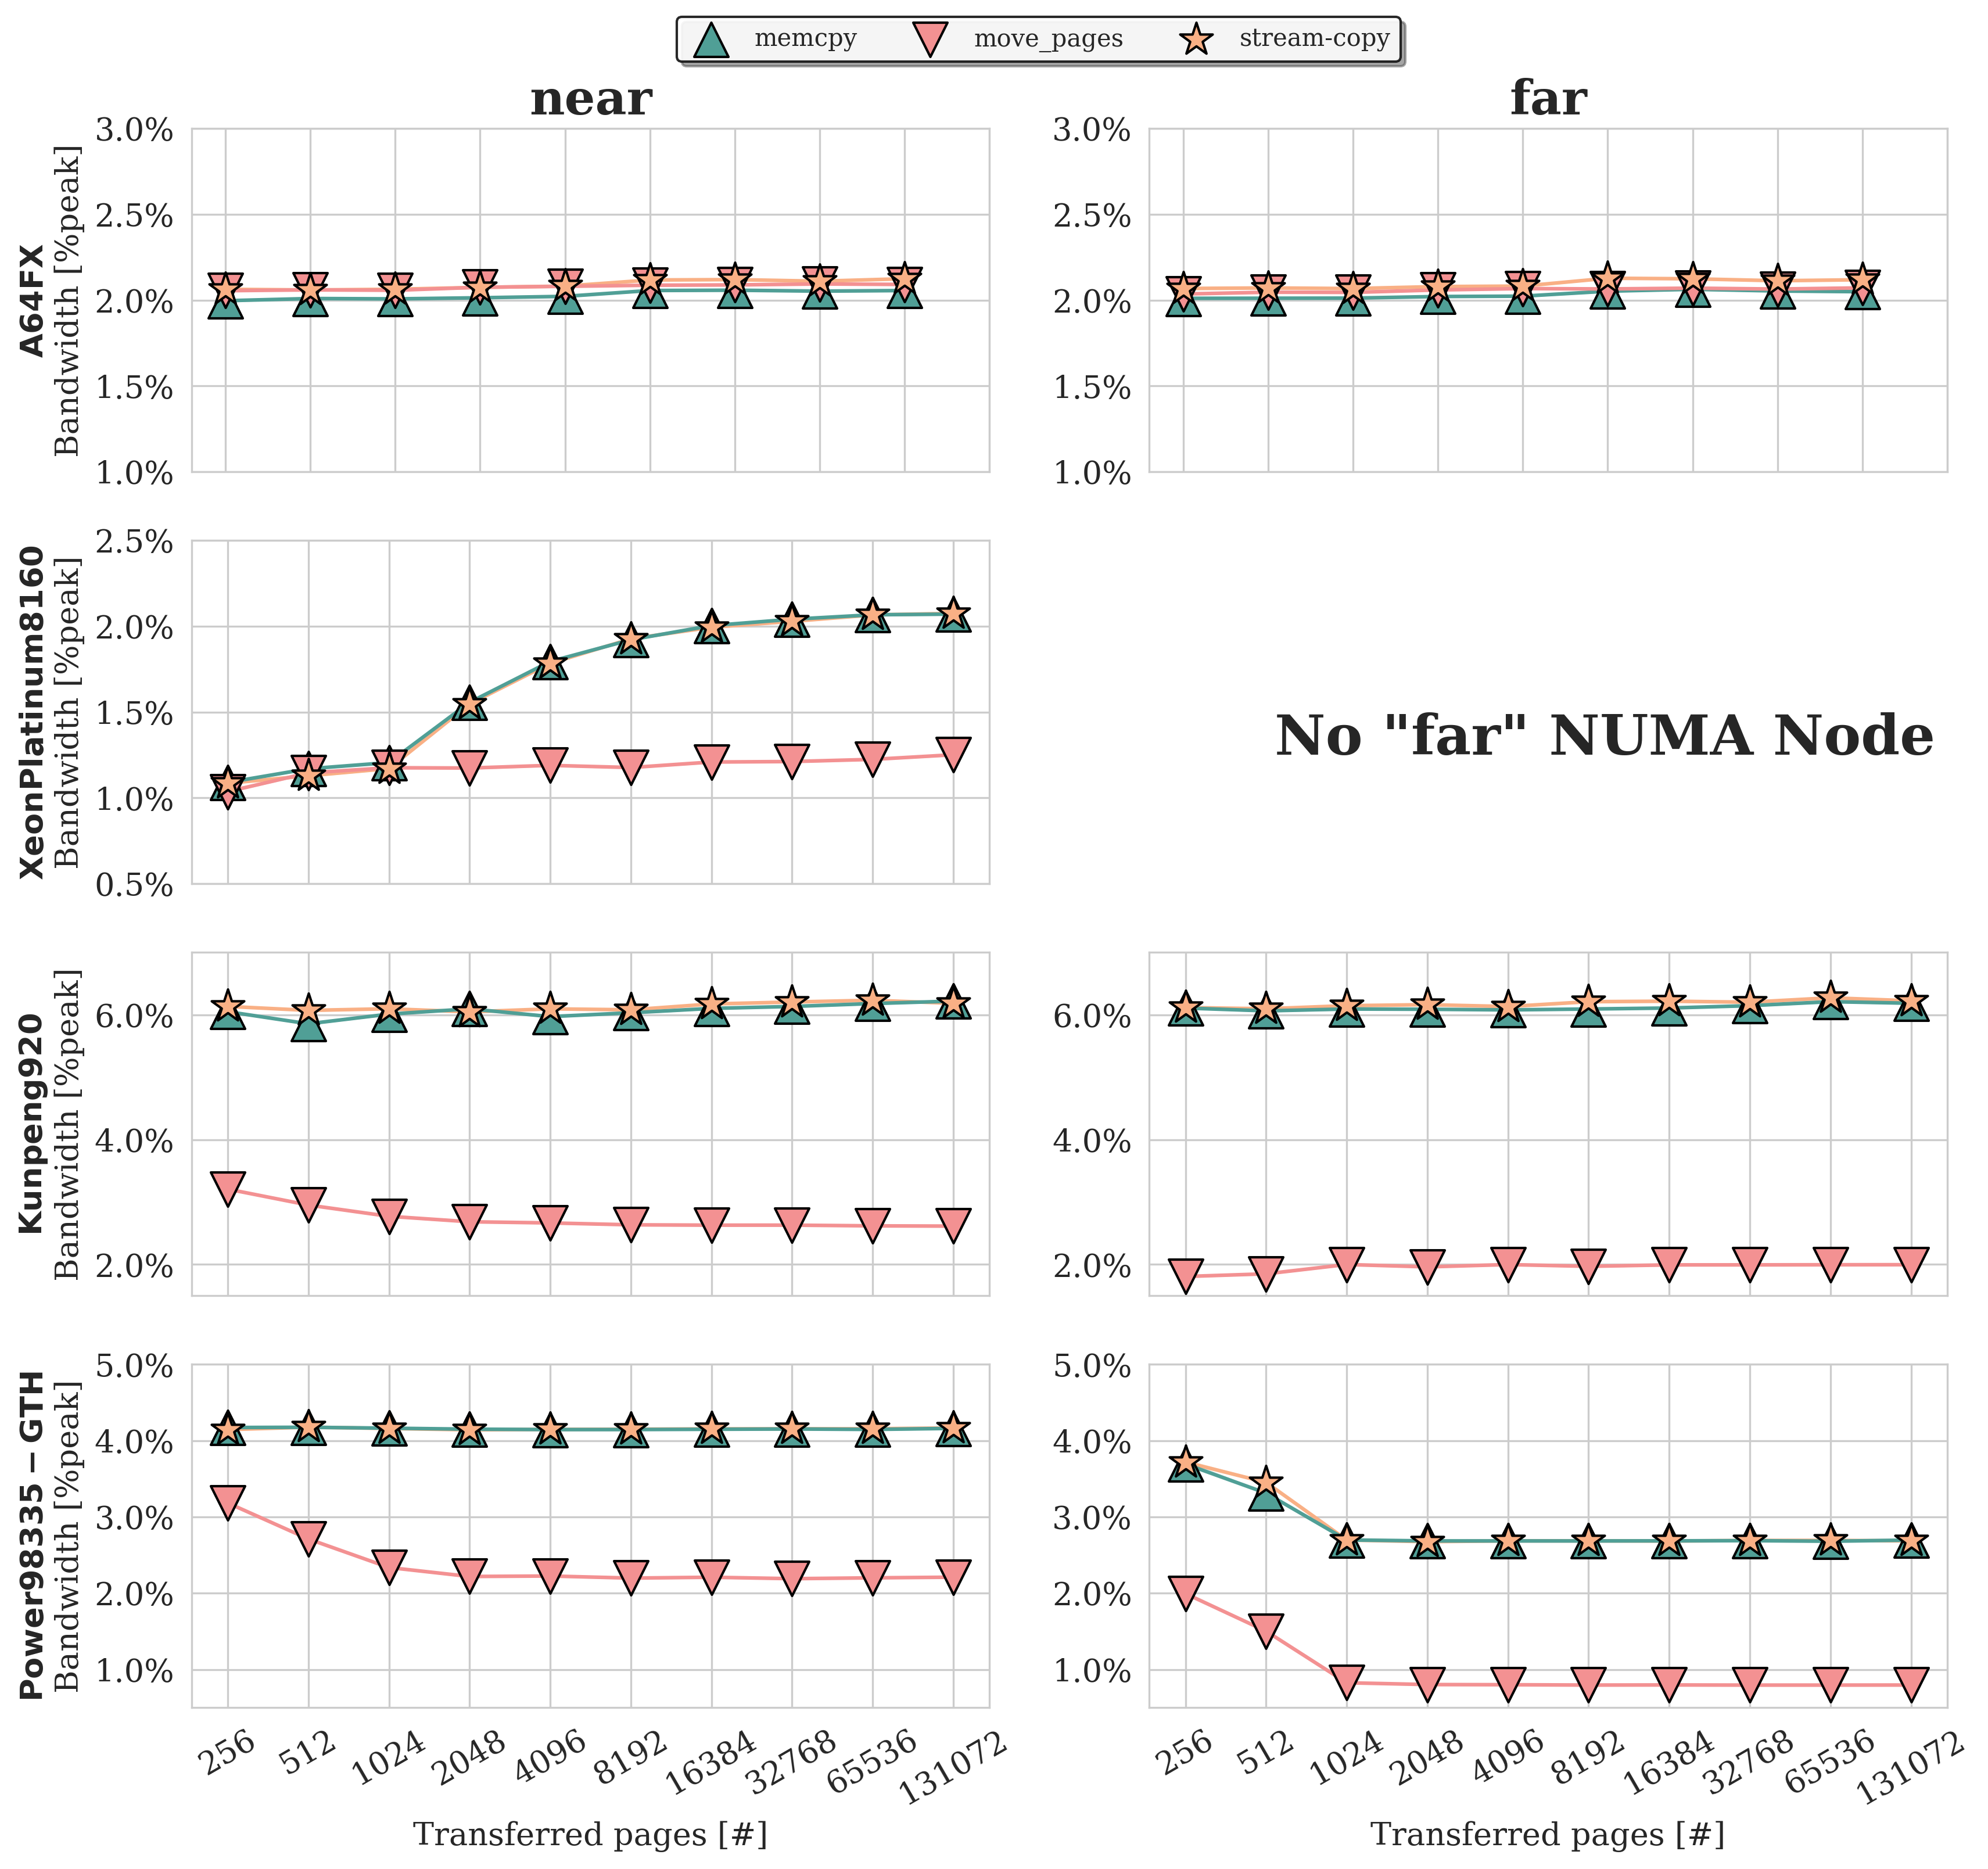

In [12]:
xticks = df.n_pages.unique()
xlabels = [str(v) for v in df.n_pages.unique()]

fig, axs = plt.subplots(len(CPUS), len(NUMA_LOC), dpi=300, figsize=(13, 3 * len(CPUS)))

for i, cpu in enumerate(CPUS): 
    for j, ttype in enumerate(NUMA_LOC): 
        #if cpu == "Xeon Platinum 8160" and ttype == "far": continue
        df_plot = df[(df.ttype == ttype) & (df.cpu == cpu)]

        df_sc_mp = df_plot[df_plot.name == "move-pages"].groupby("n_pages")["bw"].mean().reset_index()
        df_sc_mc = df_plot[df_plot.name == "memcpy"].groupby("n_pages")["bw"].mean().reset_index()
        df_sc_sc = df_plot[df_plot.name == "stream-copy"].groupby("n_pages")["bw"].mean().reset_index()
        ax = sns.lineplot(data=df_plot, x="n_pages", y="bw", ax = axs[i, j], legend=None, palette=palette_3, hue="name", ci=0)
        ax.legend([])

        ax.scatter(df_sc_mc["n_pages"], df_sc_mc["bw"], marker="^", s=200, edgecolors="#000000", color=palette_3[1], zorder=20000, label = "memcpy")
        ax.scatter(df_sc_mp["n_pages"], df_sc_mp["bw"], marker="v", s=200, edgecolors="#000000", color=palette_3[2], zorder=20000, label = "move_pages")
        ax.scatter(df_sc_sc["n_pages"], df_sc_sc["bw"], marker="*", s=200, edgecolors="#000000", color=palette_3[0], zorder=20000, label = "stream-copy")

        if (i, j) == (0, 0): 
            ax.legend(labelspacing=0.9, ncol=3, bbox_to_anchor=(1.53, 1.36), shadow=True, edgecolor="#111111", framealpha=0.9)
        else: 
            ax.legend_.remove()
        if j == 0: 
            ax.set_ylabel(r"$\bf{" + cpu + "}$\nBandwidth [%peak]", fontsize=13)
        else: 
            ax.set_ylabel("")
        
        if i == 0: 
            ax.set_title(ttype, fontsize=20, weight="bold")
        
        #ax.set_ylim((3, 11))
        if cpu == "Xeon Platinum 8160" and ttype == "far": 
            ax.set_axis_off()
            plt.text(550, 13, "No \"far\" NUMA Node", fontsize=23, weight="bold")
            continue
        ax.set_xscale("log", base=2)       
        ax.set_xticks(xticks)
        
        if i == 3: 
            ax.set_xlabel(f"Transferred pages [#]", fontsize=13)
            ax.set_xticklabels(xlabels, rotation=30)
            
        else: 
            ax.set_xlabel("")
            ax.set_xticklabels([])
            
        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.set_ylim(limits[cpu])
        
        if j == 1: 
            ax.set_yticklabels([])
            
        ax.yaxis.set_major_formatter("{x}%")
        
plt.savefig("figures/mmove-benchmark.png", bbox_inches="tight", pad_inches=0.1)
        